# Correlation Analysis

## Data Importation and Cleaning

In [15]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [17]:
# import data
csv_url = 'https://raw.githubusercontent.com/pstat197/BlueAlpha3-Synergy-Analysis/refs/heads/main/data/monthly_mocha.csv'
mocha_subscriptions = pd.read_csv(csv_url)

display(mocha_subscriptions.head())

# drop response variable for correlation analysis
corr_data = mocha_subscriptions.drop(columns=['subscriptions', 'date'])

,date,subscriptions,meta_spend,meta_impressions,google_spend,google_impressions,snapchat_spend,snapchat_impressions,tiktok_spend,tiktok_impressions,moloco_spend,moloco_impressions,liveintent_spend,liveintent_impressions,roku_spend,roku_impressions,beehiiv_spend,beehiiv_impressions,amazon_spend,amazon_impressions
0,8/4/25,15540,91538.06648,16572258,116667.9945,6473132,94750.04035,3420454,0.0,0,6564.524233,367206,37766.44904,371854,0,0,18190.10332,181901,0.0,0
1,7/28/25,14525,93840.18612,25300600,180486.9558,9487127,99447.23218,3235285,0.0,0,18111.083980,820589,38543.27888,347850,0,0,20063.91811,200639,0.0,0
2,7/21/25,16880,48403.06780,14099214,200817.3250,7909118,84738.57435,4766750,0.0,0,9714.794608,369806,39697.42202,322865,0,0,20828.00074,208280,0.0,0
3,7/14/25,20113,49470.96783,13652072,215770.9242,7789279,83204.40500,4022680,0.0,0,16831.841440,554980,40561.34006,570418,0,0,24097.34426,240973,0.0,0
4,7/7/25,16492,48948.28744,10121002,209231.9668,6806878,82642.37271,4532105,0.0,0,17624.908800,894891,40012.42040,483619,0,0,19967.60420,199676,0.0,0


In [22]:
# Identify columns with all zero values
zero_value_columns = [col for col in corr_data.columns if (corr_data[col] == 0).all()]

if zero_value_columns:
    # Drop the identified columns
    corr_data = corr_data.drop(columns=zero_value_columns)
    print(f"Dropped columns with all zero values: {zero_value_columns}")
else:
    print("No columns with all zero values found.")

display(corr_data.head())

Dropped columns with all zero values: ['roku_spend', 'roku_impressions']


,meta_spend,meta_impressions,google_spend,google_impressions,snapchat_spend,snapchat_impressions,tiktok_spend,tiktok_impressions,moloco_spend,moloco_impressions,liveintent_spend,liveintent_impressions,beehiiv_spend,beehiiv_impressions,amazon_spend,amazon_impressions
0,91538.06648,16572258,116667.9945,6473132,94750.04035,3420454,0.0,0,6564.524233,367206,37766.44904,371854,18190.10332,181901,0.0,0
1,93840.18612,25300600,180486.9558,9487127,99447.23218,3235285,0.0,0,18111.083980,820589,38543.27888,347850,20063.91811,200639,0.0,0
2,48403.06780,14099214,200817.3250,7909118,84738.57435,4766750,0.0,0,9714.794608,369806,39697.42202,322865,20828.00074,208280,0.0,0
3,49470.96783,13652072,215770.9242,7789279,83204.40500,4022680,0.0,0,16831.841440,554980,40561.34006,570418,24097.34426,240973,0.0,0
4,48948.28744,10121002,209231.9668,6806878,82642.37271,4532105,0.0,0,17624.908800,894891,40012.42040,483619,19967.60420,199676,0.0,0


## Pairwise Correlation Heatmap

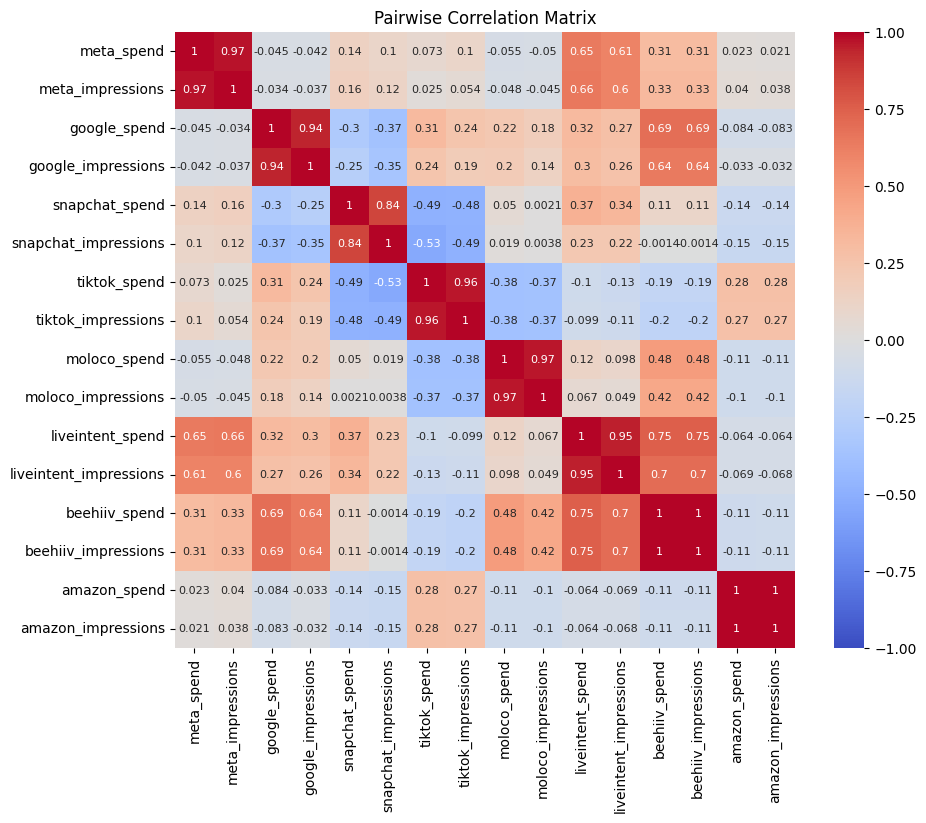

In [23]:
# Compute the pairwise correlation matrix
corr_matrix = corr_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"fontsize": 8})
plt.title('Pairwise Correlation Matrix')

plt.show()

## Variance Inflation Factor (VIF)

In [25]:
vif_data = pd.DataFrame()
vif_data["Feature"] = corr_data.columns

vif_data["VIF"] = [variance_inflation_factor(corr_data.values, i)
                          for i in range(len(corr_data.columns))]
print(vif_data)

                   Feature           VIF
0               meta_spend  3.323567e+01
1         meta_impressions  3.069986e+01
2             google_spend  8.747860e+01
3       google_impressions  4.116332e+01
4           snapchat_spend  3.722198e+01
5     snapchat_impressions  3.009011e+01
6             tiktok_spend  4.569125e+01
7       tiktok_impressions  3.052867e+01
8             moloco_spend  3.297831e+01
9       moloco_impressions  3.084501e+01
10        liveintent_spend  4.936851e+01
11  liveintent_impressions  2.609409e+01
12           beehiiv_spend  2.622107e+11
13     beehiiv_impressions  2.622107e+11
14            amazon_spend  2.026430e+03
15      amazon_impressions  2.022512e+03
